In [ ]:
 #importing all the necessary library
import matplotlib.pyplot as plt
import numpy as np 
import cv2
import os
import keras
import tensorflow as tf 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input

In [ ]:
# We use float32 as a dtatype to rescale the image.
#In this step we are preforming preprocessing_function from vgg16 library. Preprocessing_input job is to make fit to be trained in Vgg16 algo.

train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,dtype='float32') #included in our dependencies

test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,dtype='float32')

#we have read the necessary data from the uploaded folder with the height and width of the 224, and channel is 3-(Red, Green,blue image) 
#also we have shuffled the image with a batch size of 32 & it has a class of 5 which is categorical.

train_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/KneeXray/train',target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                  shuffle=True)

test_generator=test_datagen.flow_from_directory('/content/drive/MyDrive/KneeXray/val')

Found 16625 images belonging to 5 classes.
Found 607 images belonging to 5 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, Model, Input

image_input = Input(shape=(224,224, 3)) #We have input shape of 224 width, 224 height and channel 3


base_model =VGG16(input_tensor=image_input,include_top=False,weights='imagenet',pooling='avg') #Imported Vgg16 to train the model.

x = base_model.output   #imported the output layer of Vgg16.

# freeze all layers in the base model
for layer in base_model.layers:
  layer= False

# un-freeze the BatchNorm layers
for layer in base_model.layers:
    if "BatchNormalization" in layer.__class__.__name__:
        layer.trainable = True

# add custom layers
# x =tf.keras.layers.GlobalAveragePooling2D()(base_model.output)                             # global spatial average pooling layer
x =tf.keras.layers.Dense(1024, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.0001))(x)
x =tf.keras.layers.Dropout(0.4)(x)
x=tf.keras.layers.BatchNormalization()(x,training=False)
x =tf.keras.layers.Dense(5, activation='softmax')(x)

# define new model
model = Model(inputs=image_input, outputs=x)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
# We calculate the loss and optimize the image weight.#Adam--Adaptive momentum, there is a gradient decent inorder to acehive the best result we need to optimize the weight.
model.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),metrics=['accuracy'])

from keras import callbacks

my_callbacks=callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='min',restore_best_weights=True)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
#To train the model with Epoch of 30 and used the call back function to monitor the validation loss. StepsperEpoch means while training Epoch how many steps your taking to improve the accuracy. 

history=model.fit_generator(train_generator,epochs=30,validation_data=test_generator,shuffle=True,callbacks=[my_callbacks],steps_per_epoch=300)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
300/300 [==============================] - 1756s 6s/step - loss: 1.2206 - accuracy: 0.4604 - val_loss: 1.2870 - val_accuracy: 0.4596
Epoch 2/30
300/300 [==============================] - 750s 2s/step - loss: 0.8921 - accuracy: 0.6383 - val_loss: 1.1594 - val_accuracy: 0.4580
Epoch 3/30
300/300 [==============================] - 352s 1s/step - loss: 0.6769 - accuracy: 0.7315 - val_loss: 1.1892 - val_accuracy: 0.4613
Epoch 4/30
300/300 [==============================] - 171s 567ms/step - loss: 0.5910 - accuracy: 0.7583 - val_loss: 0.9398 - val_accuracy: 0.5634
Epoch 5/30
300/300 [==============================] - 103s 343ms/step - loss: 0.5374 - accuracy: 0.7788 - val_loss: 0.9315 - val_accuracy: 0.5799
Epoch 6/30
300/300 [==============================] - 79s 264ms/step - loss: 0.5014 - accuracy: 0.7917 - val_loss: 0.8188 - val_accuracy: 0.6458
Epoch 7/30
300/300 [==============================] - 74s 245ms/step - loss: 0.4730 - accuracy: 0.7950 - val_loss: 0.7236 - val_accur

In [ ]:
model.save('mode_vgg16.h5') #Saving the model once you train

In [ ]:
from tensorflow.keras.models import load_model 
model=load_model('/content/drive/MyDrive/mode_vgg16.h5')

In [ ]:
import cv2
list1=[]
from tensorflow.keras.applications.vgg16 import preprocess_input
img=cv2.imread('/content/drive/MyDrive/KneeXray/val/0/Image_1049.jpg')
image=cv2.resize(img,(224,224))
img1=preprocess_input(image)
list1.append(img1)

In [ ]:
import numpy as np

image=np.array(list1)

In [ ]:
res=model.predict(image)

In [ ]:
res

array([[9.9772710e-01, 2.2721656e-03, 7.3898116e-07, 6.4681811e-09,
        5.6274690e-10]], dtype=float32)

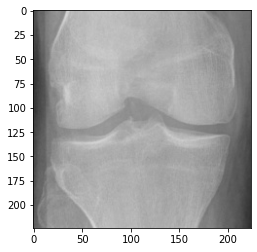

In [ ]:
import matplotlib.pyplot as plt

img=plt.imread('/content/drive/MyDrive/KneeXray/val/0/Image_1049.jpg')
plt.imshow(img)

In [ ]:
score=input("enter the doctor accuracy")
score1=int(score)/100
print(score1)

enter the doctor accuracy50
0.5


<BarContainer object of 2 artists>

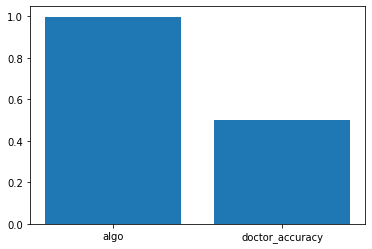

In [ ]:
name=['algo','doctor_accuracy']
prediction=[9.9772710e-01,score1]
plt.bar(x=name,height=prediction)

Text(0.5, 1.0, 'Training accuracy of 3 algorithm ')

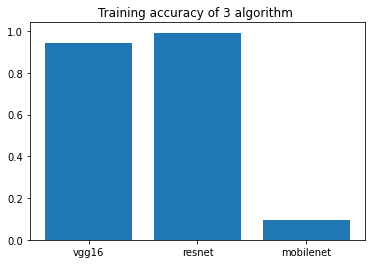

In [ ]:
import matplotlib.pyplot as plt

name=['vgg16','resnet','mobilenet']
accuracy=[0.9424,0.9918,0.0945]
plt.bar(x=name,height=accuracy)
plt.title("Training accuracy of 3 algorithm ")


Text(0.5, 1.0, 'Training loss of 3 algorithm ')

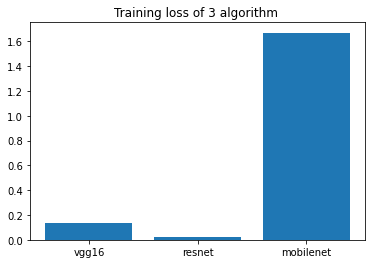

In [ ]:
import matplotlib.pyplot as plt

name=['vgg16','resnet','mobilenet']
training_loss=[0.1360,0.0210,1.6705]
plt.bar(x=name,height=training_loss)
plt.title("Training loss of 3 algorithm ")

Text(0.5, 1.0, 'val loss of 3 algorithm ')

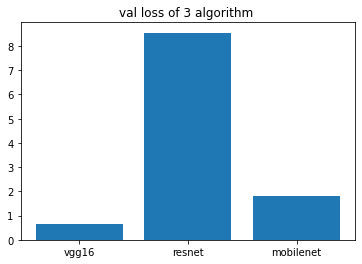

In [ ]:
import matplotlib.pyplot as plt

name=['vgg16','resnet','mobilenet']
val_loss=[0.6461,8.5509,1.8179]
plt.bar(x=name,height=val_loss)
plt.title("val loss of 3 algorithm ")

Text(0.5, 1.0, 'val accuracy of 3 algorithm ')

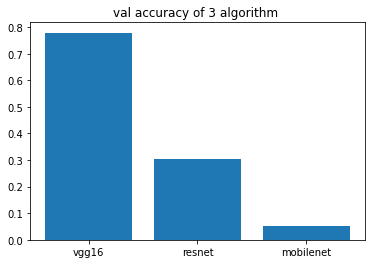

In [ ]:
import matplotlib.pyplot as plt

name=['vgg16','resnet','mobilenet']
val_accuracy=[0.7792,0.3027,0.0527]
plt.bar(x=name,height=val_accuracy)
plt.title("val accuracy of 3 algorithm ")

This is a classification report for VGG16, ResNet50

In [ ]:
import os
import cv2 
classes= os.listdir('/content/drive/MyDrive/KneeXray/val')
classes=['0','1','2','3','4']

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input
list1=[]
for i in classes:
 location='/content/drive/MyDrive/KneeXray/val'
 name= os.listdir(location+"/"+i)
 string=location+"/"+i
 for j in name:
   img=cv2.imread(string+"/"+j)
   image=cv2.resize(img,(224,224))
   img1=preprocess_input(image)
   list1.append(img1)

In [ ]:
import numpy as np
test=np.array(list1)


In [ ]:
res=model.predict(test)

In [ ]:
res1=np.argmax(res,axis=1)

In [ ]:
resnet50_model=load_model('/content/drive/MyDrive/model.h5')

In [ ]:
resnet50_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
resnet_result=resnet50_model.predict(test)

resenet_res2=np.argmax(resnet_result,axis=1)

In [ ]:
from sklearn import metrics
print('Classification Report for vgg16')
print(metrics.classification_report(test_generator.classes,res1))

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       190
           1       0.95      0.89      0.92       105
           2       0.94      0.99      0.97       200
           3       1.00      0.86      0.93        80
           4       1.00      1.00      1.00        32

    accuracy                           0.96       607
   macro avg       0.97      0.95      0.96       607
weighted avg       0.96      0.96      0.95       607



In [ ]:
from sklearn import metrics
print('Classification Report for resnet')
print(metrics.classification_report(test_generator.classes,resenet_res2))

Classification Report for resnet
              precision    recall  f1-score   support

           0       0.64      0.63      0.63       190
           1       0.48      0.25      0.33       105
           2       0.59      0.61      0.60       200
           3       0.50      0.84      0.63        80
           4       0.81      0.66      0.72        32

    accuracy                           0.58       607
   macro avg       0.60      0.60      0.58       607
weighted avg       0.59      0.58      0.57       607



In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(test_generator.classes,res1)

In [ ]:
print("confusion metrics for vgg16\n",cm)

confusion metrics for vgg16
 [[188   2   0   0   0]
 [ 10  93   2   0   0]
 [  0   2 198   0   0]
 [  0   1  10  69   0]
 [  0   0   0   0  32]]


In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(test_generator.classes,resenet_res2)

In [ ]:
print("confusion metrics for resnet \n",cm)

confusion metrics for resnet 
 [[119  16  42  12   1]
 [ 37  26  33   8   1]
 [ 29  11 122  36   2]
 [  1   1  10  67   1]
 [  0   0   0  11  21]]


In [ ]:
from sklearn.metrics import r2_score
print("r2 score for vgg16 ",r2_score(test_generator.classes,res1))


r2 score for vgg16  0.9659645253537185


In [ ]:
from sklearn.metrics import r2_score
print("r2 score for resnet",r2_score(test_generator.classes,resenet_res2))


r2 score for resnet 0.2909276115358017


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_generator.classes,res1)

0.04942339373970346

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_generator.classes,resenet_res2)

1.029654036243822

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(ytest, y_pred,multi_class='ovr')

0.9664262965730511

In [ ]:
from sklearn.preprocessing import label_binarize

ytest = label_binarize(test_generator.classes,classes=[0,1,2,3,4])

y_pred=label_binarize(resenet_res2,classes=[0,1,2,3,4])

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(ytest, y_pred,multi_class='ovr')

0.7416560895955909